

# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB dataset contains information about 10000 movies from 1960 to 2015, this information includes (id, imdb, popularity, budget, revenue, original title, homepage, cast, director, tagline, overview, genre, production company, release date, vote count, vote avverage, release year, budget_adj, revenue_adj) for each movie.
<br>
<br>
-id : (int) each movie in the data set has unique id.
<br>
-imbd_id : (object) describes the movie id on imdb site.
<br>
-popularity : (float) describes the popularity of the movie.
<br>
-budget : (int) the budget of the movie in dollars.
<br>
-revenue : (int) the revenue of the movie in dollars. 
<br>
-original_title : (object)
<br>
-cast : (object) the cast of the movie with "|" delimeter.
<br>
-homepage : (object) the official web page of the movie.
<br>
-director : (object)
<br>
-tagline : (object)
<br>
-keywords : (object)
<br>
-overview : (object)
<br>
-runtime : (int) the length of the movie.
<br>
-genres : (object) the genres of the movie with "|" delimeter.
<br>
-production_companies : (object) the production companies with "|" delimeter.
<br>
-release_date : (object) the date of releasing the movie.
<br>
-vote_count : (int) the number of votings of the movie.
<br>
-vote_average : (float) average of the votings of the movie.
<br>
-release_year : (float) the releasing year of the movie.
<br>
-budget_adj : (float) the budget of the movie in terms of 2010 dollars.
<br>
-revenue_adj : (float) the revenue of the movie in terms of 2010 dollars.
<br>
<br>
> Throughout TMDB dataset I'd like to answer some interesting questions.-what makes a movie is a good one?, is it revenue, ratings, popularity?to answer this question, for example popularity , which genre, director, production company, voting has most popular films and relations between budget and good movie
<br>
1- which director made the most popular movies?
<br>
2- which production company produced the most popular movies ?
<br>
3- which genre is the most popular among audience ?
<br>
4- In which year released the highest number of the movies?
<br>
5- which production company achieved the highest profits over years?
<br>
6- which genre achieved the highest profits over years
<br>
7- relations between variables?

In [97]:
#import the required libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [98]:
#load data and make id column as a index
df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [99]:
#view dimoension of the dataframe
df.shape

(10866, 20)

In [100]:
#view data types
df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [101]:
#view number of unique value for each variable
df.nunique()

imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [102]:
#check null values and get the sum of it
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [103]:
#get count of duplicated rows
df.duplicated().sum()

1

In [104]:
#overview statistics of data briefly
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

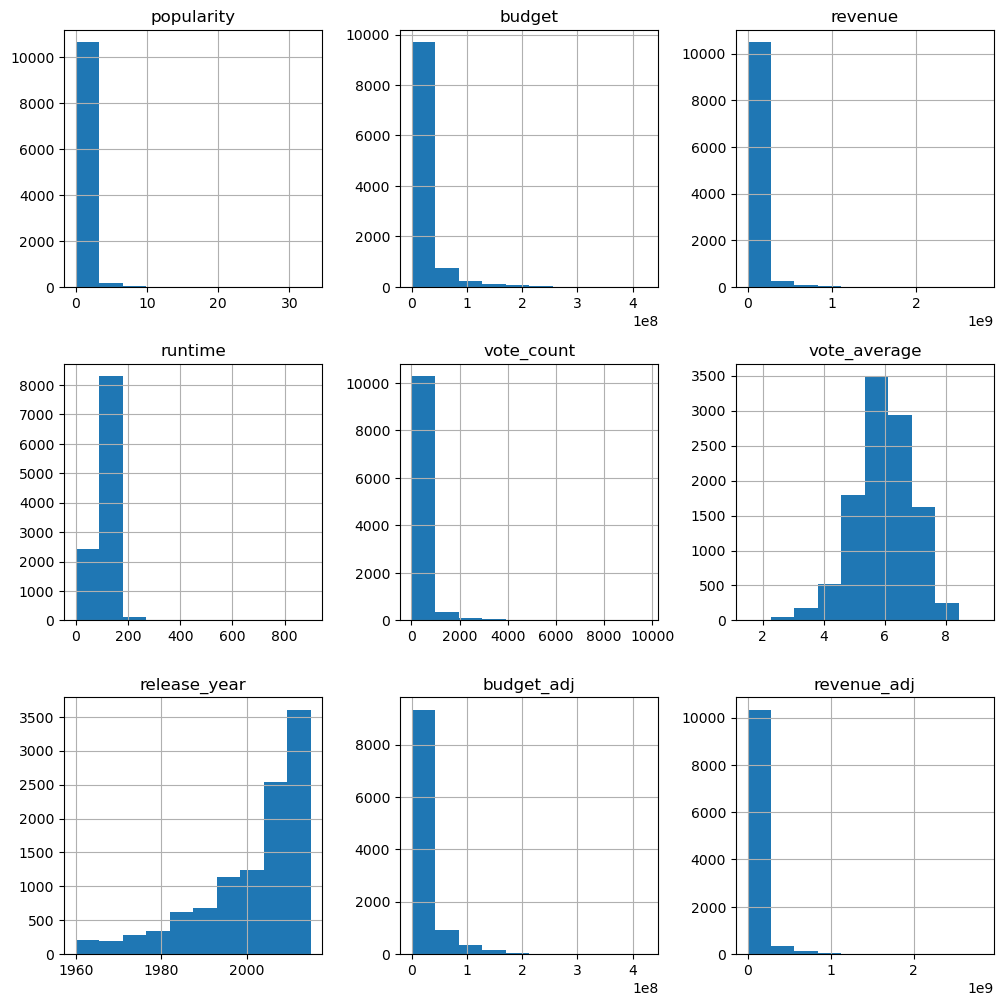

In [105]:
#overview the distribution of data
df.hist(figsize=[12,12])

In [106]:
#In revenue & budget histogram most values are around zero so I check it 
zero_budget = df.query('budget == 0')
zero_budget

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00



### Data Cleaning (Remove duplicated rows, remove unused columns)

In [107]:
#remove duplicated row
df_cleaned = df.drop_duplicates(inplace=True)

In [108]:
#remove unnecessary colummns
df_cleaned = df.drop(['imdb_id', 'homepage', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1)

In [109]:
#check cleaning process
df_cleaned.shape

(10865, 14)

In [110]:
#check duplicated rows
df_cleaned.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (which director made the most popular movies?)

In [111]:
#check the data in popular_director dataframe
#I found number of original_title unique values = 10571 != 10865(number of rows in df)
popular_director = df_cleaned[['original_title', 'director', 'popularity','release_year']]
popular_director.nunique()

original_title    10571
director           5067
popularity        10814
release_year         56
dtype: int64

In [112]:
#check null values
popular_director['original_title'].isna().sum()

0

In [113]:
#check duplicated rows in original_title column
popular_director['original_title'].duplicated().sum()

294

In [114]:
#check original_title to make decision to drop duplicated titles or not.
duplicated_rows = popular_director[popular_director['original_title'].duplicated()]
duplicated_rows

,original_title,director,popularity,release_year
id,,,,
281778,Survivor,John Lyde,0.188264,2014
296626,Finders Keepers,Alexander Yellen,0.132764,2014
42222,Julia,Fred Zinnemann,0.398651,1977
7445,Brothers,Jim Sheridan,1.223786,2009
62320,Home,Yann Arthus-Bertrand,0.688361,2009
...,...,...,...,...
39995,Long Weekend,Colin Eggleston,0.047645,1978
2661,Batman,Leslie H. Martinson,0.410366,1966
28270,Gambit,Ronald Neame,0.206537,1966


In [115]:
#movie titles are for different directors so keep duplicates.
popular_director.query('original_title == ["Survivor", "Julia", "Batman"]')

,original_title,director,popularity,release_year
id,,,,
334074,Survivor,James McTeigue,2.331636,2015
281778,Survivor,John Lyde,0.188264,2014
278632,Julia,Matthew A. Brown,0.240776,2014
42222,Julia,Fred Zinnemann,0.398651,1977
7351,Julia,Erick Zonca,0.281186,2008
268,Batman,Tim Burton,2.640852,1989
2661,Batman,Leslie H. Martinson,0.410366,1966


In [116]:
#arrange directors according to popularity of their films
top_directors = popular_director.groupby('director')['popularity'].sum().sort_values(ascending=False)
top_directors

director
Christopher Nolan            61.955206
Steven Spielberg             54.378995
Peter Jackson                49.067904
Ridley Scott                 46.213770
Quentin Tarantino            46.059995
                               ...    
Nacho G. Velilla              0.001317
Jean-Xavier de Lestrade       0.001315
Zana Briski|Ross Kauffman     0.001117
Dibakar Banerjee              0.001115
Pascal Thomas                 0.000973
Name: popularity, Length: 5067, dtype: float64

In [117]:
#top 10 directors
top_10_directors = top_directors.iloc[:10]
top_10_directors

director
Christopher Nolan    61.955206
Steven Spielberg     54.378995
Peter Jackson        49.067904
Ridley Scott         46.213770
Quentin Tarantino    46.059995
George Miller        35.600006
Tim Burton           34.648225
David Fincher        34.479784
Robert Zemeckis      33.619667
Colin Trevorrow      33.393773
Name: popularity, dtype: float64

In [118]:
#make a function to bar plot 
"""
data: the dataframe to get data to .
title: (str) the title of the chart.
xlabel: (str) the title on x axis.
ylabel: (str) the title on y axis.
"""
def bar_plot(data, title, xlabel, ylabel):
    ind = data.index
    plt.bar(ind, data, width=0.35, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ind, rotation=90)
    return plt.show()


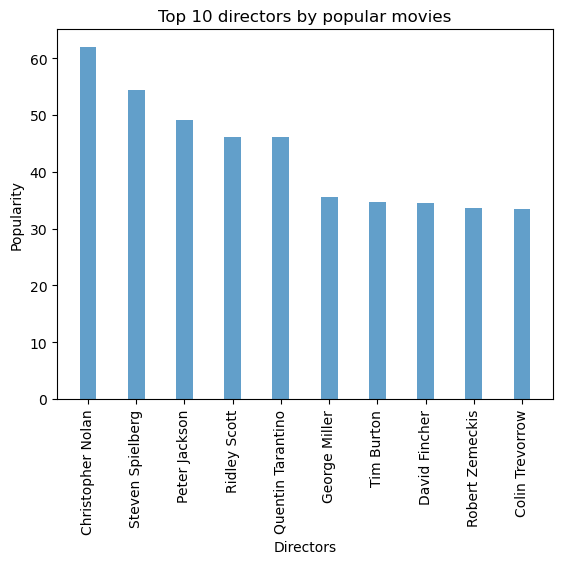

In [119]:
#plot bar chart for top 10 directors
bar_plot(top_10_directors, 'Top 10 directors by popular movies', 'Directors', 'Popularity' )

So, Christopher Nolan is the top director with most popular movies, as the sum of the popularity of his movies equals 61.955

### Research Question 2  (which production company produced the most popular movies?)

In [120]:
#make a function to split strings with "|" delimeter and drop original string
"""
data: the original datafranme includes the column with "|" delimeter strings.
col: (str) the name of the column.
new_col: (str) the name of the new column
this function take strings(contains different elements) with delimeter "|" in specific column and make a new dataframe and explode this string
then, each element in one row in new column, then rename this new column, then merge this new dataframe with the original one, then drop
the original column(with "|" delimeters).
returns data_merged_cleaned: a dataframe with split strings in consecutive rows and drop the original column.

"""
def split_func(data, col, new_col):
    #make a dataframe with split strings
    data_split = data[col].str.split('|', expand=True)
    #make a new dataframe with each company in one row
    df_split = data_split.stack()
    df_split = pd.DataFrame(df_split)
    #rename col column with new_col
    df_split.rename(columns={0:new_col}, inplace=True)
    #merge data_split with data
    data_merged = data.merge(df_split, left_on="id", right_on="id")
    #drop col column
    data_merged_cleaned = data_merged.drop(col, axis=1)
    return data_merged_cleaned


In [121]:
#split production companies and check
companies_merged_cleaned = split_func(df_cleaned, 'production_companies', 'companies')
companies_merged_cleaned.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,companies
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Universal Studios
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Amblin Entertainment
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Legendary Pictures
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Fuji Television Network
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Dentsu


In [122]:
#first make a dataframe to answer this question
popular_company = companies_merged_cleaned[['original_title', 'companies', 'popularity', 'release_year']]
popular_company.nunique()

original_title    9574
companies         7879
popularity        9796
release_year        56
dtype: int64

In [123]:
#arrange companies according to popularity of their films
top_companies = popular_company.groupby('companies')['popularity'].sum().sort_values(ascending=False)
top_companies

companies
Warner Bros.                              590.824364
Universal Pictures                        499.892618
Paramount Pictures                        418.167801
Twentieth Century Fox Film Corporation    345.733103
Walt Disney Pictures                      295.744474
                                             ...    
ITVS                                        0.001372
Logolite Entertainment                      0.000620
School Pictures                             0.000620
Parting Shots Media                         0.000620
Simcha Productions                          0.000188
Name: popularity, Length: 7879, dtype: float64

In [124]:
#top 10 companies
top_10_companies = top_companies.iloc[:10]
top_10_companies

companies
Warner Bros.                              590.824364
Universal Pictures                        499.892618
Paramount Pictures                        418.167801
Twentieth Century Fox Film Corporation    345.733103
Walt Disney Pictures                      295.744474
Columbia Pictures                         285.189093
New Line Cinema                           240.243331
Metro-Goldwyn-Mayer (MGM)                 180.300491
Village Roadshow Pictures                 156.035831
Legendary Pictures                        154.757805
Name: popularity, dtype: float64

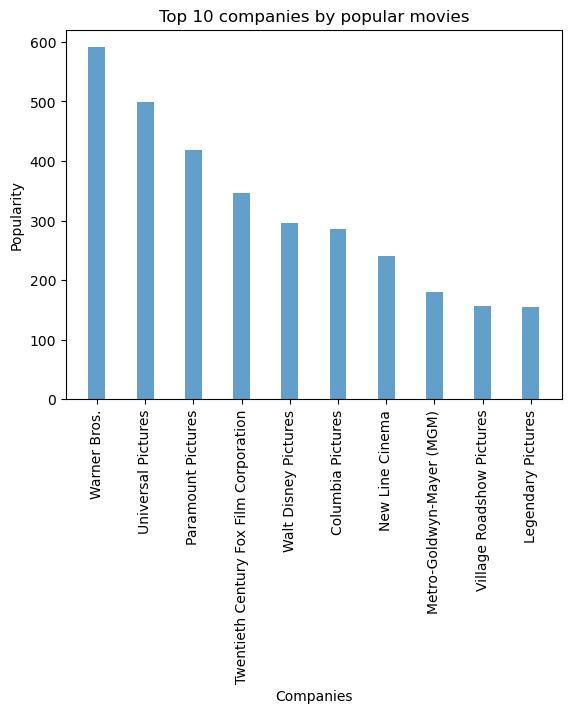

In [125]:
#plot bar chart for top 10 companies
bar_plot(top_10_companies, 'Top 10 companies by popular movies', 'Companies', 'Popularity')


So, Warner Bros. is the top Production Company with most popular movies, as the sum of the popularity of it's movies equals 590.824

### Research Question 3  (which genre is the most popular among audience?)

In [126]:
#split genres and check
genres_merged_cleaned = split_func(df_cleaned, 'genres', 'genres_split')
genres_merged_cleaned.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres_split
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Action
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Adventure
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Science Fiction
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Thriller
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,Action


In [127]:
#arrange genres according to popularity of their films
top_genres = genres_merged_cleaned.groupby('genres_split')['popularity'].sum().sort_values(ascending=False)
top_genres

genres_split
Drama              2815.517715
Comedy             2247.759649
Action             2208.238255
Thriller           2155.723620
Adventure          1697.915054
Science Fiction    1230.902062
Romance            1013.644468
Crime              1008.635823
Family              968.388793
Fantasy             909.441171
Horror              761.788804
Animation           595.674975
Mystery             558.909827
Music               198.827043
War                 196.474450
History             192.362605
Western              97.451554
Documentary          94.344445
TV Movie             45.239592
Foreign              36.001309
Name: popularity, dtype: float64

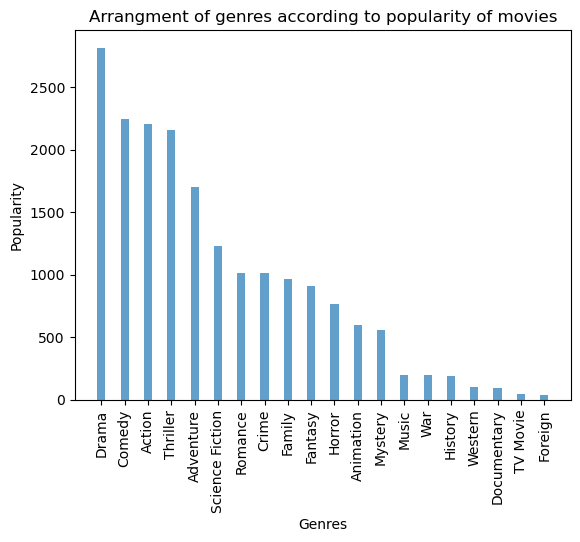

In [128]:
#plot arrangment of genres according to popularity
bar_plot(top_genres, 'Arrangment of genres according to popularity of movies', 'Genres', 'Popularity')


So, Drama is the most popular genre among audience as the sum os popularity of it's movies equals 2815.517


### Research Question 4  (in which year released the highest number of the movies?)

In [129]:
#make dataframe with number of movies in each year
df_years = df_cleaned['release_year'].value_counts()
df_years.head()

2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64

In [130]:
#get the top 10 years
top_10_years = df_years.iloc[:10]
top_10_years

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64

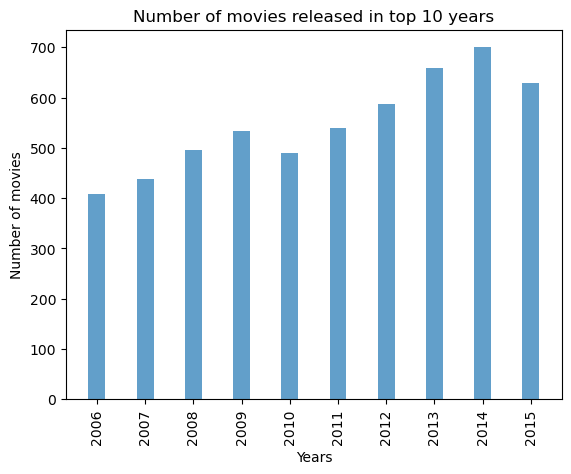

In [131]:
#plot bar chart for number of movies released in the top 10 years
bar_plot(top_10_years,'Number of movies released in top 10 years', 'Years', 'Number of movies')

So, 2014 is the top year in releasing movies with 700 movies.

### Research Question 5  (which production company achieved the highest profits over years?)

In [132]:
#add new column called profit and check
companies_merged_cleaned['profit'] = companies_merged_cleaned['revenue']-companies_merged_cleaned['budget']
companies_merged_cleaned.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,companies,profit
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Universal Studios,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Amblin Entertainment,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Legendary Pictures,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Fuji Television Network,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Dentsu,1363528810


In [133]:
#group data with companies and get sum of profits for each and check
companies_profit = companies_merged_cleaned.groupby('companies')['profit'].sum()
companies_profit

companies
"DIA" Productions GmbH & Co. KG      8350926
# Lexyn Productions                        0
10 West Studios                            0
100 Feet Productions               -10000000
1019 Entertainment                    801508
                                      ...   
uFilm                               16439255
uFund                              -12000000
verture Films                              0
Ã–sterreichischer Rundfunk (ORF)       11294
í”„ë¡œë•ì…˜M                               0
Name: profit, Length: 7879, dtype: int64

In [134]:
#sort companies according profit 
top_profit_companies = companies_profit.sort_values(ascending=False)
top_profit_companies

companies
Warner Bros.                              34703823331
Universal Pictures                        32575422791
Paramount Pictures                        27538581413
Twentieth Century Fox Film Corporation    27402754987
Walt Disney Pictures                      22008457637
                                             ...     
Silver Bullet Productions (II)             -165710090
France 2 CinÃ©ma                           -193953476
Wild Bunch                                 -245161142
Franchise Pictures                         -359214359
Boram Entertainment Inc.                   -413912431
Name: profit, Length: 7879, dtype: int64

In [135]:
#get top 10 companies in profit
top_10_profit_companies = top_profit_companies.iloc[:10]
top_10_profit_companies

companies
Warner Bros.                              34703823331
Universal Pictures                        32575422791
Paramount Pictures                        27538581413
Twentieth Century Fox Film Corporation    27402754987
Walt Disney Pictures                      22008457637
Columbia Pictures                         18252662429
New Line Cinema                           14082723398
Amblin Entertainment                      12443416032
DreamWorks SKG                            10079564846
DreamWorks Animation                       8332549256
Name: profit, dtype: int64

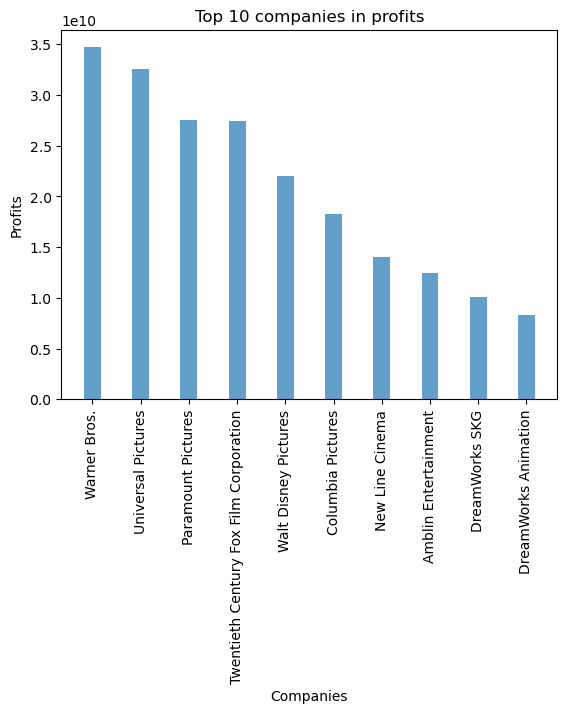

In [136]:
#plot top 10 companies in profits
bar_plot(top_10_profit_companies, 'Top 10 companies in profits', 'Companies', 'Profits')

So, Warner Bros. achieved the highest profits over years with profits equals 34703823331 dollars

limitations, around half of data has budget = zero , if i drop zero budget i will lose half of my data, i should replace it with the median but median of the data also equals zero

### Research Question 6  (which genre achieved the highest profits over years?)

In [137]:
#add new column called porfit and check
genres_merged_cleaned['profit'] = genres_merged_cleaned['revenue'] - genres_merged_cleaned['budget']
genres_merged_cleaned.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres_split,profit
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Action,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Adventure,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Science Fiction,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Thriller,1363528810
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,Action,228436354


In [138]:
#group data with genres and get sum of profits for each and check
genres_profit = genres_merged_cleaned.groupby('genres_split')['profit'].sum()
genres_profit.head()

genres_split
Action       107439517424
Adventure    111199018978
Animation     36415300151
Comedy        91898042240
Crime         33450381145
Name: profit, dtype: int64

In [139]:
#sort companies according profit 
top_profit_genres = genres_profit.sort_values(ascending=False)
top_profit_genres.head()

genres_split
Adventure    111199018978
Action       107439517424
Comedy        91898042240
Drama         82593320653
Thriller      71281744013
Name: profit, dtype: int64

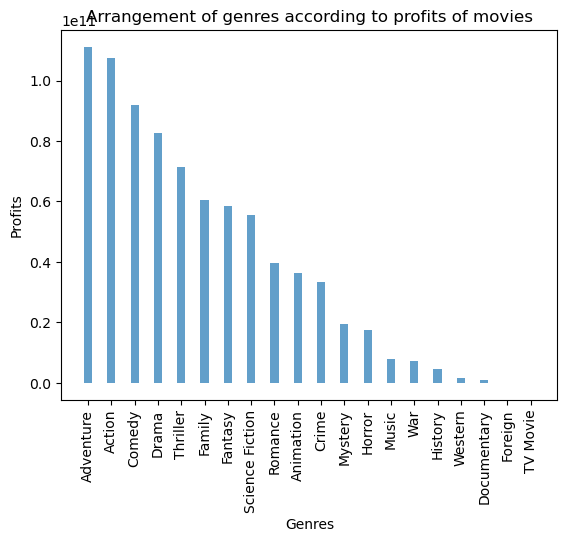

In [140]:
#plot arrangement of the genres according to profits
bar_plot(top_profit_genres, 'Arrangement of genres according to profits of movies', 'Genres', 'Profits')

So, Adventures achieved the highest profits over years with profits equals 111199018978 dollars

limitations, around half of data has budget = zero , if i drop zero budget i will lose half of my data, i should replace it with the median but median of the data also equals zero

### Research Question 7  (relations between variables?)

In [141]:
#make a function to plot scatter plots for different variables
"""
x: value on X-axis
y: value on Y-axis
title: (str) the title of the scatter plot
xlabel: (str) the label of x-axis
ylabel: (str) the label of y-axis
return scatter plot for specific values x & y 
"""
def scatter_plot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y, alpha=0.8)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

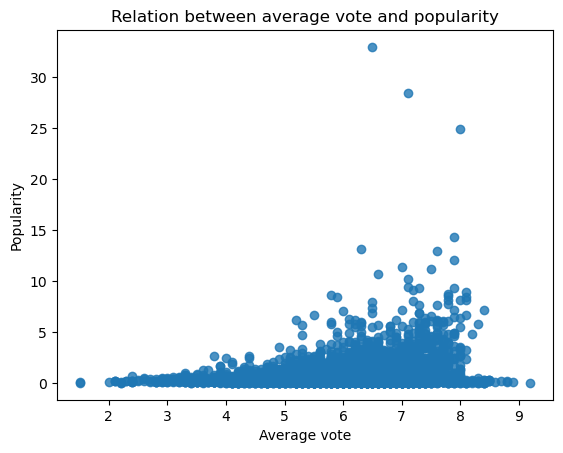

In [142]:
#plot scatter between vote_average and popularity
scatter_plot(df_cleaned['vote_average'], df_cleaned['popularity'], 'Relation between average vote and popularity', 'Average vote', 'Popularity')

the relation between average vote and popularity is positive correlation

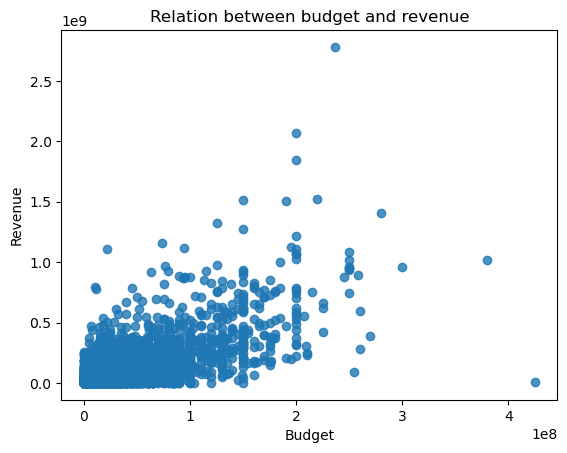

In [143]:
#relation between budget and revenue
scatter_plot(df_cleaned['budget'], df_cleaned['revenue'], 'Relation between budget and revenue', 'Budget', 'Revenue')

-the relation between budget and revenue is positive correlation.
<br>
-limitation, around half of data has zero budget.

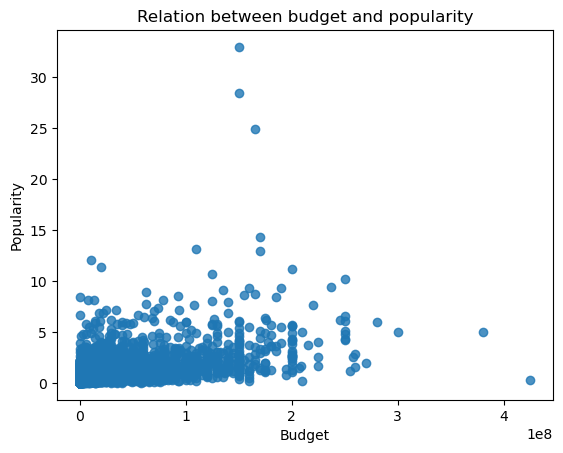

In [144]:
#relation between budget and popularity
scatter_plot(df_cleaned['budget'], df_cleaned['popularity'], 'Relation between budget and popularity', 'Budget', 'Popularity')

-the relation between budget and popularity is positive correlation.
<br>
-limitation, around half of data has zero budget.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Research Question 1 (which director made the most popular movies?)

So, Christopher Nolan is the top director with most popular movies, as the sum of the popularity of his movies equals 61.955

### Research Question 2  (which production company produced the most popular movies?)

So, Warner Bros. is the top Production Company with most popular movies, as the sum of the popularity of it's movies equals 590.824

### Research Question 3  (which genre is the most popular among audience?)

So, Drama is the most popular genre among audience as the sum os popularity of it's movies equals 2815.517

### Research Question 4  (In which year released the highest number of the movies?)

So, 2014 is the top year in releasing movies with 700 movies.

### Research Question 5  (which production company achieved the highest profits over years?)

So, Warner Bros. achieved the highest profits over years with profits equals 34703823331 dollars

limitations, around half of data has budget = zero ,if i drop zero budget i will lose half of my data, i should replace it with the median but median of the data also equals zero

### Research Question 6  (which genre achieved the highest profits over years?)

So, Adventures achieved the highest profits over years with profits equals 111199018978 dollars

limitations, around half of data has budget = zero , if i drop zero budget i will lose half of my data, i should replace it with the median but median of the data also equals zero

### Research Question 7  (relations between variables?)

the relation between average vote and popularity is positive correlation

-the relation between budget and revenue is positive correlation.
<br>
-limitation, around half of data has zero budget.

-the relation between budget and popularity is positive correlation.
<br>
-limitation, around half of data has zero budget.


## Resources

1-Udacity Classrooom
<br>
2-stackover flow: to write in new lines in juputer noyebook. https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell
<br>
3-fwd community: to split genres with "|" delimeter and make dataframe .https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587/4
<br>
 and another source from fwd community : https://nfpdiscussions.udacity.com/t/split-with-column-genres-and-take-the-first-genre-error/162090/9
<br>
4- fwd community : to merge genres_df with the cleaned_df . https://nfpdiscussions.udacity.com/t/how-can-i-analyze-the-genres-column/168506/3
<br>
5-Stackoverflow: to rorate x-tick in bar charts. https://stackoverflow.com/questions/3464359/is-it-possible-to-wrap-the-text-of-xticks-in-matplotlib-in-python
<br>
6- webinar of the project and it's slides
<br>
7- geeksforgeeks: to add percentage to pie chart. https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
<br>
8- fwd community: to make a function for repititive codes. https://nfpdiscussions.udacity.com/t/project-investigate-a-dataset-review-function-of-block-code/164956/6